<a href="https://colab.research.google.com/github/gmitt98/Ames-Housing-ML/blob/main/Ames_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# add the case shiller price index to the data in order to incorporate national price trends
ames = 'https://bootcamp-proj-4.s3.us-west-1.amazonaws.com/AmesHousing.csv'
case_shiller = 'https://bootcamp-proj-4.s3.us-west-1.amazonaws.com/cs_index_us.csv'

ames_df = pd.read_csv(ames)
cs_df = pd.read_csv(case_shiller)

In [94]:
ames_df = ames_df.merge(cs_df, left_on = 'Yr Sold', right_on = 'Year', how = 'left')
ames_df.drop(columns = ['Year'], inplace = True)

In [95]:
ames_df['Total SF'] = ames_df['Total Bsmt SF'] + ames_df['1st Flr SF'] + ames_df['2nd Flr SF']

In [96]:
numerical_features = ames_df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    ames_df[feature].fillna(ames_df[feature].median(), inplace=True)

In [97]:
categorical_features = ames_df.select_dtypes(include=[np.object]).columns.tolist()
for feature in categorical_features:
    ames_df[feature].fillna('None', inplace=True)

<ipython-input-97-f9aa48ba4269>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = ames_df.select_dtypes(include=[np.object]).columns.tolist()


In [98]:
numeric_data = ames_df.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())

In [99]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

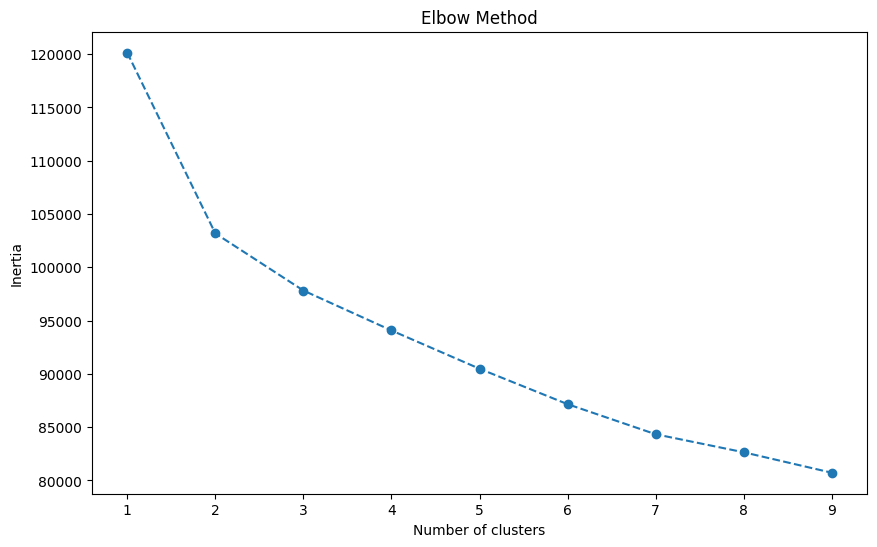

In [100]:
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [101]:
ames_df['Cluster'] = clusters

In [102]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [103]:
cluster_summary = ames_df.groupby('Cluster').mean()
print(cluster_summary[['Lot Area', 'Total SF', 'SalePrice']])

             Lot Area     Total SF      SalePrice
Cluster                                          
0         8758.803009  2007.912607  126985.722779
1        15594.425837  3826.777512  322547.031100
2         9845.566308  2741.474910  195014.093190


<ipython-input-103-7967ed4581ec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = ames_df.groupby('Cluster').mean()


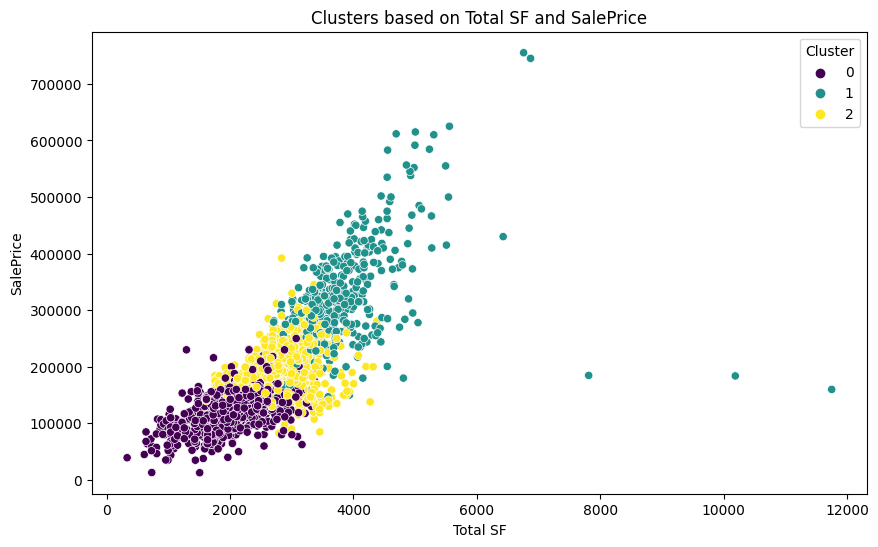

In [104]:
plt.figure(figsize=(10, 6))
x_val = 'Total SF'
y_val = 'SalePrice'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

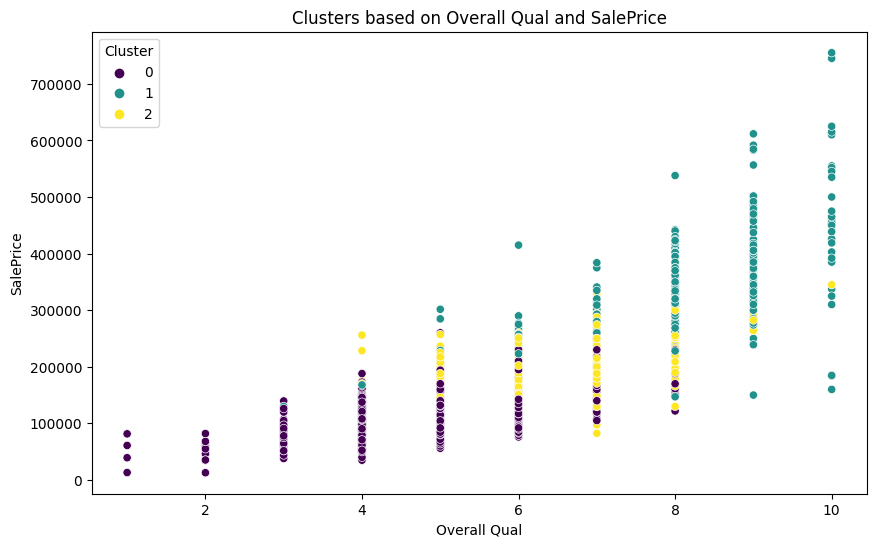

In [105]:
plt.figure(figsize=(10, 6))
x_val = 'Overall Qual'
y_val = 'SalePrice'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

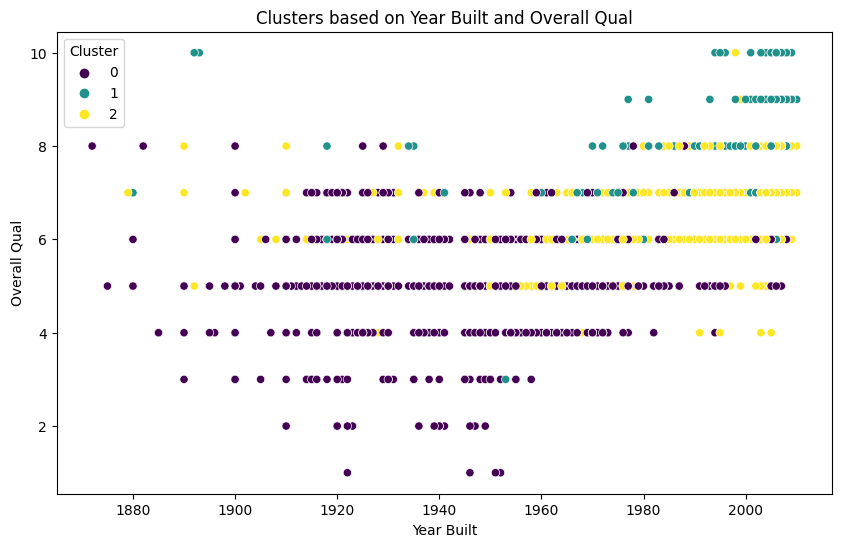

In [106]:
plt.figure(figsize=(10, 6))
x_val = 'Year Built'
y_val = 'Overall Qual'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

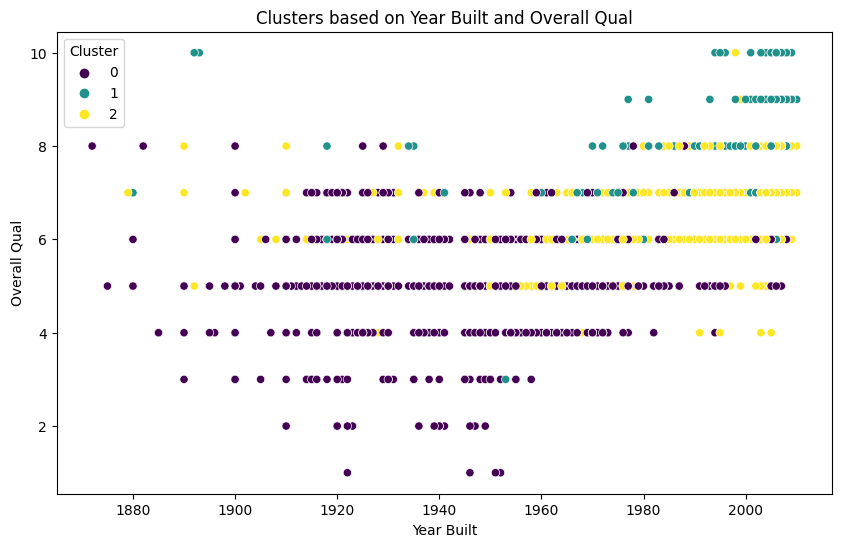

In [107]:
plt.figure(figsize=(10, 6))
x_val = 'Year Built'
y_val = 'Overall Qual'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

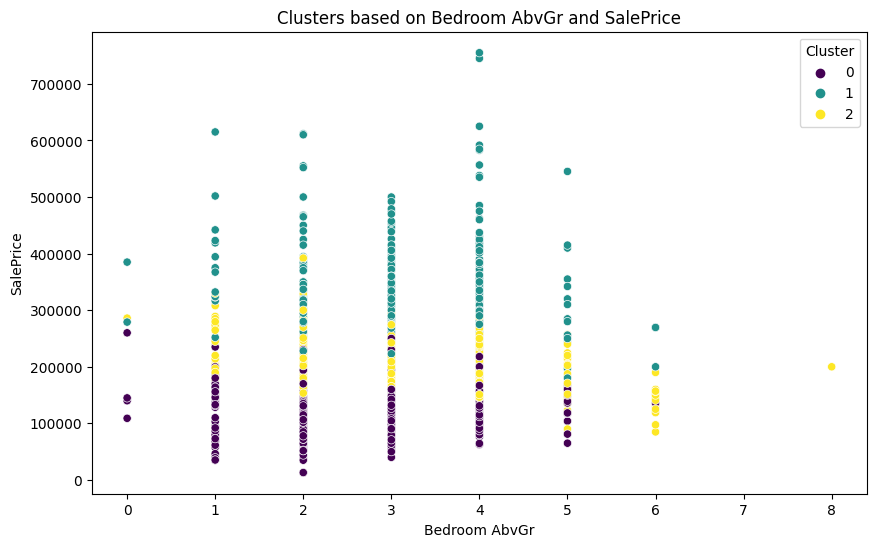

In [108]:
plt.figure(figsize=(10, 6))
x_val = 'Bedroom AbvGr'
y_val = 'SalePrice'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

In [110]:
cluster_summary = ames_df.groupby('Cluster').mean()
print(cluster_summary)

               Order           PID  MS SubClass  Lot Frontage      Lot Area  \
Cluster                                                                       
0        1531.992837  7.730316e+08    54.466332     64.225645   8758.803009   
1        1470.011962  6.364988e+08    44.796651     87.543062  15594.425837   
2        1380.634409  6.704054e+08    65.757168     68.078853   9845.566308   

         Overall Qual  Overall Cond   Year Built  Year Remod/Add  \
Cluster                                                            
0            5.122493      5.874642  1950.618195     1971.940544   
1            8.014354      5.227273  1995.279904     1999.727273   
2            6.592294      5.299283  1988.336918     1993.894265   

         Mas Vnr Area  ...  Enclosed Porch  3Ssn Porch  Screen Porch  \
Cluster                ...                                             
0           40.813037  ...       35.963467    1.695559     13.256447   
1          325.100478  ...       12.346890    3

<ipython-input-110-40859bf786fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = ames_df.groupby('Cluster').mean()


In [114]:
cluster_summary[['Year Built', 'Year Remod/Add', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr','Total SF','SalePrice']]

,Year Built,Year Remod/Add,Overall Qual,Overall Cond,Bedroom AbvGr,Total SF,SalePrice
Cluster,,,,,,,
0,1950.618195,1971.940544,5.122493,5.874642,2.678367,2007.912607,126985.722779
1,1995.279904,1999.727273,8.014354,5.227273,3.131579,3826.777512,322547.031100
2,1988.336918,1993.894265,6.592294,5.299283,2.970430,2741.474910,195014.093190


Findings:

Higher price homes are newer and more recently remodeled (cluster 1)
Lower price home are older and not recently remodeled (cluster 0)
There are slightly more bedrooms above ground in the newer homes
Square footage has also gone up a lot in newer homes, even in the last 20-30 years